In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow import keras

In [4]:
df = pd.read_csv('./data_in/df_kersh_2018_2019.csv')

In [6]:
df_y = df['Label']
df_X = df.drop(columns=['Label'])

X = df_X.values
y = df_y.values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [14]:
y_train[y_train == 2019] = 1 
y_train[y_train == 2018] = 0

y_test[y_test == 2019] = 1
y_test[y_test == 2018] = 0

num_classes = len(np.unique(y_train))

In [13]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)

In [15]:
model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [16]:
epochs = 10 #25 #5 #500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/10
86/86 [==============================] - 6s 71ms/step - loss: 0.3957 - sparse_categorical_accuracy: 0.8202 - val_loss: 70.3274 - val_sparse_categorical_accuracy: 0.4846
Epoch 2/10
86/86 [==============================] - 2s 22ms/step - loss: 0.1977 - sparse_categorical_accuracy: 0.9345 - val_loss: 45.3005 - val_sparse_categorical_accuracy: 0.4846
Epoch 3/10
86/86 [==============================] - 2s 22ms/step - loss: 0.1007 - sparse_categorical_accuracy: 0.9769 - val_loss: 7.7430 - val_sparse_categorical_accuracy: 0.4846
Epoch 4/10
86/86 [==============================] - 2s 20ms/step - loss: 0.0600 - sparse_categorical_accuracy: 0.9912 - val_loss: 10.7233 - val_sparse_categorical_accuracy: 0.4846
Epoch 5/10
86/86 [==============================] - 2s 21ms/step - loss: 0.0347 - sparse_categorical_accuracy: 0.9956 - val_loss: 2.1469 - val_sparse_categorical_accuracy: 0.5944
Epoch 6/10
86/86 [==============================] - 2s 20ms/step - loss: 0.0321 - sparse_categorical_a

In [17]:
model = keras.models.load_model("best_model.h5")

#test_loss, test_acc = model.evaluate(x_test, y_test)
test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

53/53 [==============================] - 0s 4ms/step - loss: 2.2973 - sparse_categorical_accuracy: 0.5398
Test accuracy 0.5398335456848145
Test loss 2.2972867488861084


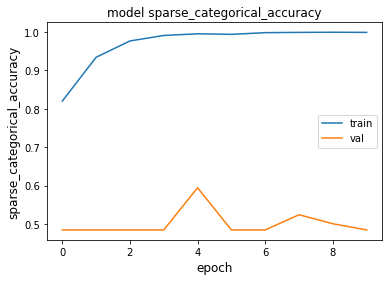

In [20]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

(0, 10)

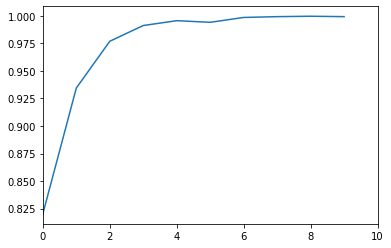

In [21]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.xlim(0,10)

In [22]:
print("Train accuracy", history.history[metric][9])
print("Test accuracy", test_acc)

Train accuracy 0.9992676377296448
Test accuracy 0.5398335456848145


(add some data_viz above . . . EDA befor ethe ML . . . ). 